This example integrates a densely packed planetary system which becomes unstable on a timescale of only a few orbits. The IAS15 integrator with adaptive timestepping is used. The bodies have a finite size and merge if they collide. Note that the size is unphysically large in this example.

In [1]:
import rebound
import numpy as np
sim = rebound.Simulation()

# Collision and Boundary Options
sim.collision = "direct"
sim.collision_resolve = "merge"

'''
sim.collision_resolve_keep_sorted = 1
sim.boundary = "open"
boxsize = 200.
sim.configure_box(boxsize)
sim.track_energy_offset = 1
'''

# Integrator Options
sim.integrator = "ias15"
sim.dt = 0.01*2.*np.pi

#simulation time
tmax = 1e3*2.*np.pi

np.random.seed(42)

In [2]:
# Add star

star = rebound.Particle()
star.m = 1.
star.r = 0.1
sim.add(star)

In [3]:
# Add planets

N_planets = 7
for i in range(0, N_planets-1):
    a = 1. + i/(N_planets-1)
    v = np.sqrt(1/a)
    planet = rebound.Particle()
    planet.m = 1e-4
    planet.r = 4e-2
    planet.lastcollision = 0
    planet.x = a;
    planet.vy = v;
    sim.add(planet)

sim.move_to_com()

In [4]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	7
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.062832
---------------------------------
<rebound.particle.Particle object at 0x7f3e4b69d950, m=1.0 x=-0.0008494903058165102 y=0.0 z=0.0 vx=0.0 vy=-0.0005118416649612428 vz=0.0>
<rebound.particle.Particle object at 0x7f3e4b69d9d8, m=0.0001 x=0.9991505096941835 y=0.0 z=0.0 vx=0.0 vy=0.9994881583350388 vz=0.0>
<rebound.particle.Particle object at 0x7f3e4b69d950, m=0.0001 x=1.1658171763608502 y=0.0 z=0.0 vx=0.0 vy=0.9253082581075902 vz=0.0>
<rebound.particle.Particle object at 0x7f3e4b69d9d8, m=0.0001 x=1.3324838430275168 y=0.0 z=0.0 vx=0.0 vy=0.8655135621194774 vz=0.0>
<rebound.particle.Particle object at 0x7f3e4b69d950, m=0.0001 x=1.4991505096941835 y=0.0 z=0.0 vx=0.0 vy=0.8159847392627648 vz=0.0>
<rebound.particle.Particle object at 0x7f3e4b69d9d8, m=0.0001 x=1.6

In [5]:
E0 = sim.calculate_energy()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-zydz30xd because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


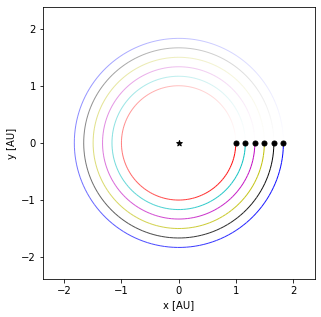

In [6]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [8]:
sim.getWidget(size=(500,300),scale=2.0)

Widget(N=7, count=2, height=300.0, orbit_data=b'T\xb0^\xba\x00\x00\x00\x00\x00\x00\x00\x00s\xf9\x7f?\xb9\xb1\x…

In [9]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

0.0011348788113031967


In [10]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.104348
---------------------------------
<rebound.particle.Particle object at 0x7f3e7ec847b8, m=1.0 x=9.033466912522499e-05 y=0.0005261499646533544 z=0.0 vx=-0.0003670893330324766 vy=-3.0492167622096493e-05 vz=0.0>
<rebound.particle.Particle object at 0x7f3e7ec84730, m=0.0002 x=0.5832817508705345 y=-0.8054777354814157 z=0.0 vx=0.8497566060244118 vy=0.5750003053973204 vz=0.0>
<rebound.particle.Particle object at 0x7f3e7ec847b8, m=0.0001 x=-1.6275852632111758 y=1.028819937709715 z=0.0 vx=-0.3749023324080752 vy=-0.5995978686065054 vz=0.0>
<rebound.particle.Particle object at 0x7f3e7ec84730, m=0.00030000000000000003 x=-0.14744164326067913 y=-1.5597880377562785 z=0.0 vx=0.7820941502280064 vy=-0.08182702198905654 vz=0.0>
---------------------------------
